In [2]:
import boto3, os, sagemaker
from sagemaker import get_execution_role

iam_role = get_execution_role()
sm_boto3 = boto3.client('sagemaker')
my_region = boto3.Session().region_name
sm_session = sagemaker.session.Session(boto3.Session())

print("Success")

Success


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

adult = pd.read_csv("s3://adultdata/donor.txt", header=None, delimiter=r",\s+")
adult.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
cols = {
    "age": "continuous",
    "workclass": "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked",
    "fnlwgt": "continuous",
    "education": "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool",
    "education-num": "continuous",
    "marital-status": "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse",
    "occupation": "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    "relationship": "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried",
    "race": "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black",
    "sex": "Female, Male",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands",
    "income": ">50K, <=50K",
}

with open('cols_dict.pickle', 'wb') as f:
    pickle.dump(cols, f, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
cols_dict = pickle.load(open('cols_dict.pickle', 'rb'))

In [6]:
adult.columns = [cols for cols in cols_dict.keys()]

In [7]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
dtypes = {
    "age": int,
    "workclass": str,
    "fnlwgt": int,
    "education": str,
    "education-num": int,
    "marital-status": str,
    "occupation": str,
    "relationship": str,
    "race": str,
    "sex": str,
    "capital-gain": int,
    "capital-loss": int,
    "hours-per-week": int,
    "native-country": str,
    "income": str
}

adult = adult.astype(dtypes)

In [9]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [10]:
adult.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
1836 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
1843 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
583 number of missing values in column native-country
0 number of missing values in column income


Remove Missing values '?'

In [12]:
for x in range(len(list(adult.columns))):
    if sum((adult.iloc[:,x]).astype('str').str.contains('\?')) != 0:
        adult = adult[~adult.iloc[:,x].str.contains("\?")]

In [13]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
0 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
0 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
0 number of missing values in column native-country
0 number of missing values in column income


In [14]:
len(adult)

30162

# Random Forest Implementation

In [74]:
label = adult['income']
features = adult.drop(['income','fnlwgt'], axis = 1)

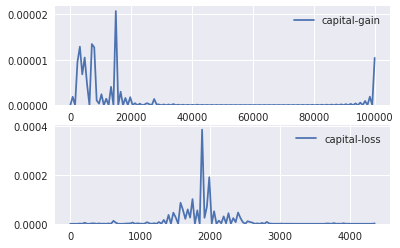

In [77]:
fig, axs = plt.subplots(2,ncols=1)
sns.kdeplot(features['capital-gain'], ax=axs[0])
sns.kdeplot(features['capital-loss'], ax=axs[1])
plt.show()

Taking log transform on these two features and incrementing values slightly to prevent log(0)

In [17]:
var = ['capital-gain', 'capital-loss']
features_new = pd.DataFrame(data = features)
features_new[var] = features[var].apply(lambda x: np.log(x + 1))

Convert the caterogical to one hot encoding

In [18]:
features_new = pd.get_dummies(features_new)

In [19]:
features_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.000000
education-num,30162.0,10.121312,2.549995,1.0,9.0,10.0,13.0,16.000000
capital-gain,30162.0,0.743647,2.470518,0.0,0.0,0.0,0.0,11.512925
capital-loss,30162.0,0.355226,1.595010,0.0,0.0,0.0,0.0,8.379539
hours-per-week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.000000
workclass_Federal-gov,30162.0,0.031265,0.174035,0.0,0.0,0.0,0.0,1.000000
workclass_Local-gov,30162.0,0.068530,0.252657,0.0,0.0,0.0,0.0,1.000000
workclass_Private,30162.0,0.738877,0.439254,0.0,0.0,1.0,1.0,1.000000
workclass_Self-emp-inc,30162.0,0.035608,0.185313,0.0,0.0,0.0,0.0,1.000000
workclass_Self-emp-not-inc,30162.0,0.082853,0.275664,0.0,0.0,0.0,0.0,1.000000


Split train and test first before scaling as it can lead to information leakage

In [20]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(features_new,label,test_size = 0.2,random_state = 1234)  

print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24129 samples.
Testing set has 6033 samples.


Scaling all numeric features in both datasets

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.fit_transform(X_test[numeric])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-u

In [83]:
X_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
count,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,...,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000
mean,0.293319,0.607313,0.064519,0.043073,0.407243,0.030627,0.068631,0.738986,0.035476,0.083054,...,0.003689,0.000373,0.002155,0.001285,0.000622,0.000580,0.911973,0.002072,0.000539,0.248663
std,0.180134,0.170278,0.214638,0.191790,0.122587,0.172309,0.252831,0.439196,0.184983,0.275969,...,0.060622,0.019310,0.046374,0.035821,0.024926,0.024081,0.283340,0.045475,0.023206,0.432247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.410959,0.733333,0.000000,0.000000,0.448980,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 a

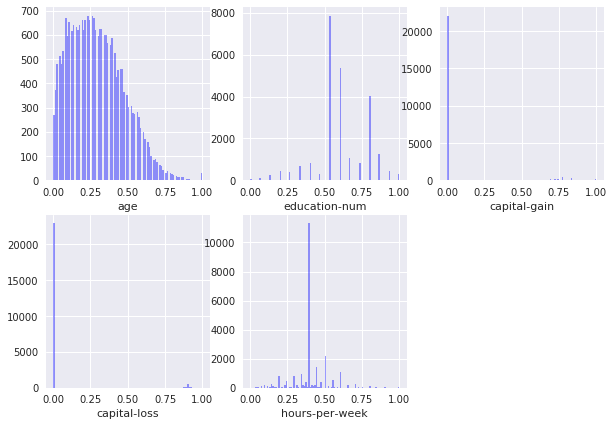

In [22]:
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2

for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.distplot(X_train[numeric[i-1]], kde=False, bins=100, color="b")
plt.show()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
5168,0.561644,0.533333,0.0,0.000000,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
27080,0.136986,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32084,0.424658,0.266667,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
27153,0.219178,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7452,0.493151,0.666667,0.0,0.871628,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:

y_train = y_train.map({'<=50K':0,'>50K':1})
y_test = y_test.map({'<=50K':0,'>50K':1})


In [126]:
X = pd.DataFrame(np.vstack((X_train.iloc[:,:-1],X_test.iloc[:,:-1])))
X.to_csv('alldata.csv')

In [136]:
X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
5168,0.561644,0.533333,0.0,0.000000,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
27080,0.136986,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32084,0.424658,0.266667,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
27153,0.219178,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7452,0.493151,0.666667,0.0,0.871628,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
# Get feature names
features = X_train.columns[:-1]
len(features)

103

### Upload train and test to S3

In [26]:
trainX = pd.DataFrame(X_train)
trainX['target'] = y_train

testX = pd.DataFrame(X_test)
testX['target'] = y_test

trainX.to_csv('train.csv')
testX.to_csv('test.csv')

In [27]:
bucket = "adultdata"

# send data to S3. SageMaker will take training data from s3
trainpath = sm_session.upload_data(
    path='train.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

testpath = sm_session.upload_data(
    path='test.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

## Script to train

In [87]:
%%writefile script.py

import argparse
import os

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, classification_report,fbeta_score,accuracy_score
from sklearn import metrics



# inference functions ---------------




if __name__ =='__main__':

    print('extracting arguments')
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    # to simplify the demo we don't use all sklearn RandomForest hyperparameters
    parser.add_argument('--n-estimators', type=int, default=10)
    parser.add_argument('--min-samples-leaf', type=int, default=3)
    # Data, model, and output directories
    parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN'))
    parser.add_argument('--test', type=str, default=os.environ.get('SM_CHANNEL_TEST'))
    parser.add_argument('--train-file', type=str, default='train.csv')
    parser.add_argument('--test-file', type=str, default='test.csv')
    #parser.add_argument('--features', type=str, default = (pd.read_csv(args.train_file).columns[:-1]) )  # in this script we ask user to explicitly name features
    #parser.add_argument('--target', type=str, default = (pd.read_csv(args.train_file).columns[-1])) # in this script we ask user to explicitly name the target

    args, _ = parser.parse_known_args()

    print('reading data')
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    features = train_df.columns[:-1]
    target = train_df.columns[-1]
    
    print('building training and testing datasets')
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[target]
    y_test = test_df[target]

    # train
    print('training model')
    model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        min_samples_leaf=args.min_samples_leaf,
        
        n_jobs=-1)
    
    model.fit(X_train, y_train)

    print('validating model')
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,1], pos_label=1)
    print('AUC:{:.6f}'.format(metrics.auc(fpr, tpr)))
    print("F-score on testing data: {:.6f}".format(fbeta_score(y_test, y_pred, beta = 0.5)))
    
    print("Accuracy : {}".format(accuracy_score(y_test, y_pred)))
    
    results = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(results)

    print("Classification Report:")
    target_names = ['Lower Salary class', 'Higher Salary class']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # print couple perf metrics
    #for q in [10, 50, 90]:
    #    print('AE-at-' + str(q) + 'th-percentile: '
    #          + str(np.percentile(a=abs_err, q=q)))
        
    # persist model
    modelname = 'model-' + str(args.n_estimators) + '-' + str(args.min_samples_leaf) + '.joblib'
    path = os.path.join(args.model_dir,modelname)
    joblib.dump(model, path)
    print('model persisted at ' + path)


Overwriting script.py


### Launching locally

In [88]:
! python script.py --n-estimators 100 \
                   --min-samples-leaf 2 \
                   --model-dir ./models/ \
                   --train ./ \
                   --test ./ \


extracting arguments
reading data
building training and testing datasets
training model
validating model
AUC:0.913462
F-score on testing data: 0.742812
Accuracy : 0.8614288082214487
Confusion Matrix:
[[4267  258]
 [ 578  930]]
Classification Report:
                     precision    recall  f1-score   support

 Lower Salary class       0.88      0.94      0.91      4525
Higher Salary class       0.78      0.62      0.69      1508

          micro avg       0.86      0.86      0.86      6033
          macro avg       0.83      0.78      0.80      6033
       weighted avg       0.86      0.86      0.86      6033

model persisted at ./models/model-100-2.joblib


## Train using Sagemaker

In [30]:
# We use the Estimator from the SageMaker Python SDK
from sagemaker.sklearn.estimator import SKLearn

sklearn_estimator = SKLearn(
    entry_point='script.py',
    role = get_execution_role(),
    train_instance_count=1,
    train_instance_type='ml.c5.xlarge',
    framework_version='0.20.0',
    base_job_name='rf-scikit',
    metric_definitions=[
        {'Name': 'AUC',
         'Regex': "AUC:([0-9.]+).*$"}],
    hyperparameters = {'n-estimators': 100,
                       'min-samples-leaf': 3
                       #'features': '',
                       #'target': 'target'
                      })

In [31]:
sklearn_estimator.fit({'train':trainpath, 'test': testpath})

2020-03-17 17:08:23 Starting - Starting the training job...
2020-03-17 17:08:25 Starting - Launching requested ML instances......
2020-03-17 17:09:26 Starting - Preparing the instances for training...
2020-03-17 17:10:14 Downloading - Downloading input data...
2020-03-17 17:10:47 Training - Training image download completed. Training in progress..2020-03-17 17:10:47,704 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-03-17 17:10:47,706 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-03-17 17:10:47,716 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-03-17 17:10:50,960 sagemaker-containers INFO     Module script does not provide a setup.py. 
Generating setup.py
2020-03-17 17:10:50,960 sagemaker-containers INFO     Generating setup.cfg
2020-03-17 17:10:50,961 sagemaker-containers INFO     Generating MANIFEST.in
2020-03-17 17:10:50,961 sagemaker-containers INFO     Installing modu

### Hyperparameter Tuning

In [114]:
# we use the Hyperparameter Tuner
from sagemaker.tuner import IntegerParameter

# Define exploration boundaries
hyperparameter_ranges = {
    'n-estimators': IntegerParameter(70, 200),
    'min-samples-leaf': IntegerParameter(5, 7)}

# create Optimizer
Optimizer = sagemaker.tuner.HyperparameterTuner(
    estimator=sklearn_estimator,
    hyperparameter_ranges=hyperparameter_ranges,
    base_tuning_job_name='RF-tuner',
    objective_type='Maximize',
    objective_metric_name='AUC',
    metric_definitions=[
        {'Name': 'AUC',
         'Regex': "AUC:([0-9.]+).*$"}],  # extract tracked metric from logs with regexp 
    max_jobs=20,
    max_parallel_jobs=2)

In [115]:
Optimizer.fit({'train': trainpath, 'test': testpath})

In [129]:
results = Optimizer.analytics().dataframe()
results.sort_values('FinalObjectiveValue',ascending=False).head(5)

,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,min-samples-leaf,n-estimators
11,0.914839,42.0,2020-03-17 06:42:46+00:00,RF-tuner-200317-0629-009-f40babfb,Completed,2020-03-17 06:42:04+00:00,5.0,191.0
8,0.914542,46.0,2020-03-17 06:46:17+00:00,RF-tuner-200317-0629-012-5c22f933,Completed,2020-03-17 06:45:31+00:00,5.0,176.0
7,0.914469,49.0,2020-03-17 06:48:02+00:00,RF-tuner-200317-0629-013-ac1cc527,Completed,2020-03-17 06:47:13+00:00,5.0,198.0
0,0.914417,46.0,2020-03-17 06:57:31+00:00,RF-tuner-200317-0629-020-379380b9,Completed,2020-03-17 06:56:45+00:00,5.0,196.0
1,0.914336,49.0,2020-03-17 06:56:50+00:00,RF-tuner-200317-0629-019-f48c8228,Completed,2020-03-17 06:56:01+00:00,5.0,199.0


## Using the best model to make predictions and get insights

In [89]:
# RUN script with best parameters
! python script.py --n-estimators 191 \
                   --min-samples-leaf 5 \
                   --model-dir ./models/ \
                   --train ./ \
                   --test ./ \

extracting arguments
reading data
building training and testing datasets
training model
validating model
AUC:0.914100
F-score on testing data: 0.743930
Accuracy : 0.8606000331510029
Confusion Matrix:
[[4285  240]
 [ 601  907]]
Classification Report:
                     precision    recall  f1-score   support

 Lower Salary class       0.88      0.95      0.91      4525
Higher Salary class       0.79      0.60      0.68      1508

          micro avg       0.86      0.86      0.86      6033
          macro avg       0.83      0.77      0.80      6033
       weighted avg       0.86      0.86      0.85      6033

model persisted at ./models/model-191-5.joblib


In [62]:

from sklearn.externals import joblib

num_estimators = 191
min_samples_leaf = 5
model_path = './models/model'+'-'+str(num_estimators)+'-'+str(min_samples_leaf)+'.joblib'
print('Loading and predicting using model' + model_path)
def model_fn(path):
    clf = joblib.load(path)
    return clf

clf = model_fn(model_path)
y_pred = clf.predict(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = clf.predict_proba(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = (pd.DataFrame(y_prob)).iloc[:,1]
y_true = y_test.values
print('Done')

Loading and predicting using model./models/model-191-5.joblib
Done


Confusion Matrix:
[[4278  247]
 [ 591  917]]
Classification Report:
                     precision    recall  f1-score   support

 Lower Salary class       0.88      0.95      0.91      4525
Higher Salary class       0.79      0.61      0.69      1508

          micro avg       0.86      0.86      0.86      6033
          macro avg       0.83      0.78      0.80      6033
       weighted avg       0.86      0.86      0.85      6033

AUC:0.9146290135850054
F-score on testing data: 0.743835


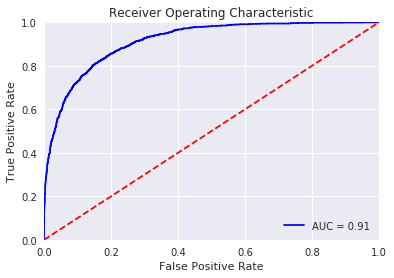

In [67]:

from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc, fbeta_score

results = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(results)



print("Classification Report:")
target_names = ['Lower Salary class', 'Higher Salary class']
print(classification_report(y_true, y_pred, target_names=target_names))


fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:{}'.format(roc_auc))
print("F-score on testing data: {:.6f}".format(fbeta_score(y_true, y_pred, beta = 0.5)))

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

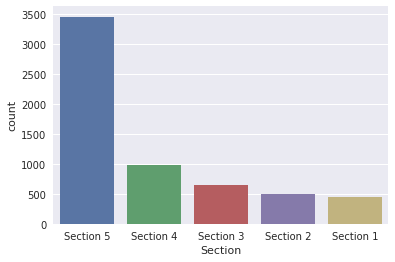

In [119]:
import seaborn as sns

individual_sections = pd.cut(y_prob,5, labels=["Section 5", "Section 4", "Section 3","Section 2","Section 1"])
output = pd.DataFrame(individual_sections)
output.columns = ["Section"]
sns.set(style="darkgrid")
ax = sns.countplot(x="Section", data=output)

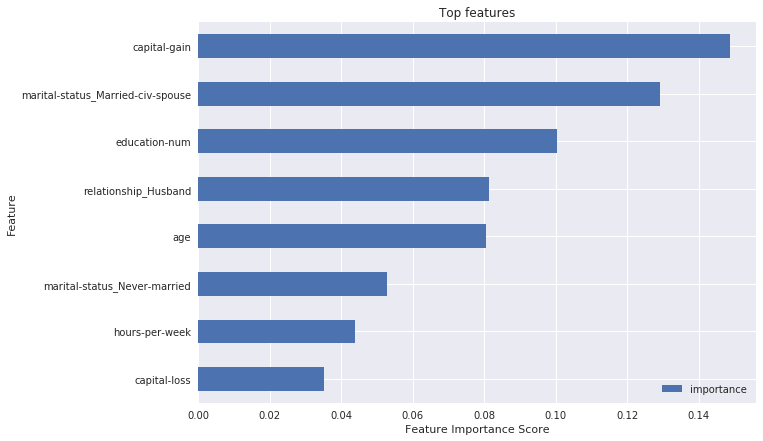

In [69]:
# Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

# Plot
feat_imp = pd.DataFrame({'importance':importances})    
feat_imp['feature'] = pd.read_csv('test.csv').iloc[:,:-1].columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:8]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Top features', figsize=(10,7))
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

## Using the non-tuned model to get insights

Loading and predicting using model./models/model-100-2.joblib
Done
Confusion Matrix:
[[4249  276]
 [ 567  941]]
Classification Report:
                     precision    recall  f1-score   support

 Lower Salary class       0.88      0.94      0.91      4525
Higher Salary class       0.77      0.62      0.69      1508

          micro avg       0.86      0.86      0.86      6033
          macro avg       0.83      0.78      0.80      6033
       weighted avg       0.86      0.86      0.85      6033

AUC:0.9132926418218854
F-score on testing data: 0.737923


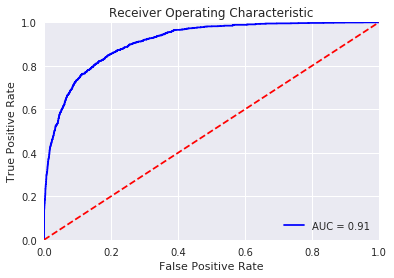

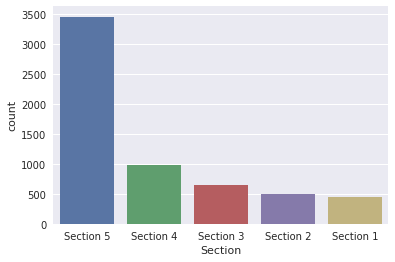

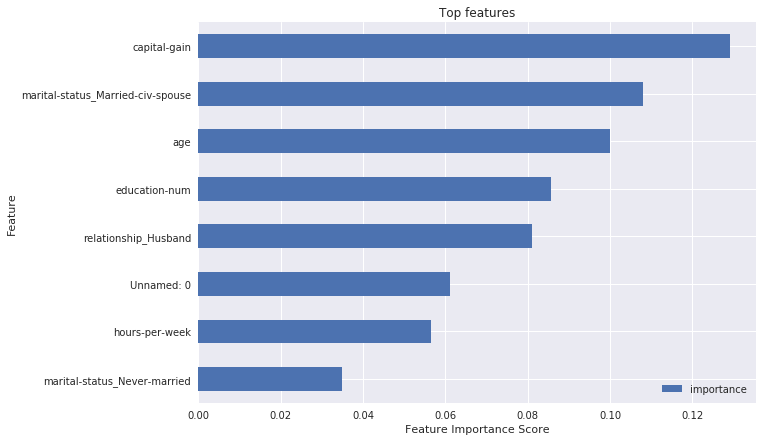

In [70]:

from sklearn.externals import joblib

num_estimators = 100
min_samples_leaf = 2
model_path = './models/model'+'-'+str(num_estimators)+'-'+str(min_samples_leaf)+'.joblib'
print('Loading and predicting using model' + model_path)
def model_fn(path):
    clf = joblib.load(path)
    return clf

clf = model_fn(model_path)
y_pred = clf.predict(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = clf.predict_proba(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = (pd.DataFrame(y_prob)).iloc[:,1]
y_true = y_test.values
print('Done')




from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc, fbeta_score

results = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(results)



print("Classification Report:")
target_names = ['Lower Salary class', 'Higher Salary class']
print(classification_report(y_true, y_pred, target_names=target_names))


fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:{}'.format(roc_auc))
print("F-score on testing data: {:.6f}".format(fbeta_score(y_true, y_pred, beta = 0.5)))

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




# Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

# Plot
feat_imp = pd.DataFrame({'importance':importances})    
feat_imp['feature'] = pd.read_csv('test.csv').iloc[:,:-1].columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:8]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Top features', figsize=(10,7))
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


## Additional Plots for reference

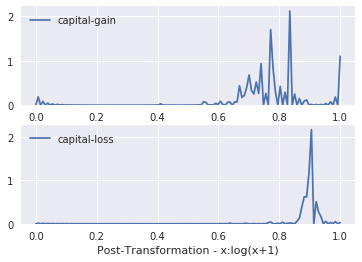

In [81]:
# Post Transformation
fig, axs = plt.subplots(2,ncols=1)
sns.kdeplot(X_train['capital-gain'], ax=axs[0])
sns.kdeplot(X_train['capital-loss'], ax=axs[1])
plt.xlabel('Post-Transformation - x:log(x+1)')
plt.show()

[(0.7, 0.95)]

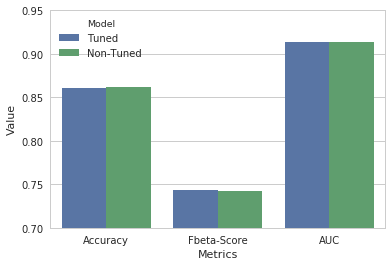

In [108]:
## Post and pre hyperparameter tuning

Metric = ['Accuracy' , 'Fbeta-Score' , 'AUC','Accuracy' , 'Fbeta-Score' , 'AUC']
Value = [0.8606,0.743930,0.914100,0.8614,0.742812,0.913462]
Model = ['Tuned','Tuned','Tuned','Non-Tuned','Non-Tuned','Non-Tuned']
res = pd.DataFrame({'Metrics':Metric, 'Value':Value, 'Model':Model })
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Metrics", y="Value", hue="Model", data=res)
ax.set(ylim=(0.7,0.95))

[(0.55, 1)]

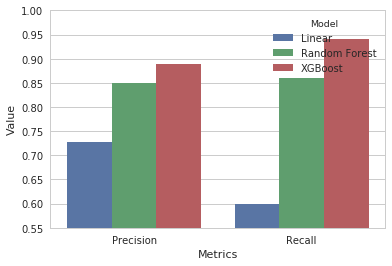

In [115]:
Metric = ['Precision', 'Recall', 
         'Precision', 'Recall', 
          'Precision', 'Recall']
Value = [0.7278582930756844,0.5994694960212201,
         0.85,0.86,
         0.89,0.94]
Model = ['Linear','Linear',
         'Random Forest','Random Forest',
         'XGBoost','XGBoost']
res = pd.DataFrame({'Metrics':Metric, 'Value':Value, 'Model':Model })
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Metrics", y="Value", hue="Model", data=res)
ax.set(ylim=(0.55,1))

[(0.55, 0.95)]

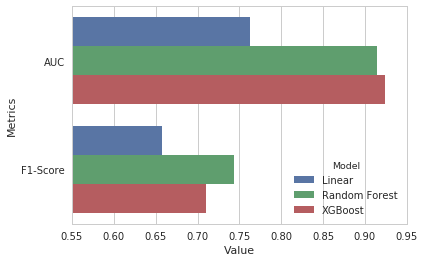

In [118]:
Metric = ['AUC',  'F1-Score',
          'AUC',  'F1-Score',
          'AUC',  'F1-Score']
Value = [0.7623866817122675,0.6574545454545454,
         0.9146,0.7439,
         0.924,0.71]
Model = ['Linear','Linear',
         'Random Forest','Random Forest',
         'XGBoost','XGBoost']
res = pd.DataFrame({'Metrics':Metric, 'Value':Value, 'Model':Model })
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Value", y="Metrics", hue="Model", data=res)
ax.set(xlim=(0.55,0.95))

## Use the best model to get insights

In [152]:

from sklearn.externals import joblib

num_estimators = 191
min_samples_leaf = 5
model_path = './models/model'+'-'+str(num_estimators)+'-'+str(min_samples_leaf)+'.joblib'
print('Loading and predicting using model' + model_path)
def model_fn(path):
    clf = joblib.load(path)
    return clf

clf = model_fn(model_path)
alldata = pd.read_csv('alldata.csv',index_col= False)
col_names = X_train.columns.insert(0, 'id') 
alldata.columns = col_names[:-1]
y_pred = clf.predict(alldata)
y_prob = clf.predict_proba(alldata)
y_prob = (pd.DataFrame(y_prob)).iloc[:,1]
y_true = y_test.values
print('Done')

Loading and predicting using model./models/model-191-5.joblib
Done


In [155]:
alldata['pred'] = y_prob

In [166]:
new_data = alldata.iloc[:,1:6]
new_data['workclass'] = (alldata.iloc[:, 6:11] == 1).idxmax(1)
new_data['education_level'] = (alldata.iloc[:, 11:27] == 1).idxmax(1)
new_data['marital_status'] = (alldata.loc[:,col_names.str.startswith('marital')] == 1).idxmax(1)
new_data['occupation'] = (alldata.loc[:, col_names.str.startswith('occ')] == 1).idxmax(1)
new_data['relationship'] = (alldata.loc[:, col_names.str.startswith('rela')] == 1).idxmax(1)
new_data['race'] = (alldata.loc[:, col_names.str.startswith('race')] == 1).idxmax(1)
new_data['sex'] = (alldata.loc[:, col_names.str.startswith('sex')] == 1).idxmax(1)
new_data['native_country'] = (alldata.loc[:, col_names.str.startswith('native')] == 1).idxmax(1)
new_data['pred'] = alldata.loc[:,'pred']

In [167]:
new_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education_level,marital_status,occupation,relationship,race,sex,native_country,pred
0,0.561644,0.533333,0.0,0.000000,0.500000,workclass_Self-emp-not-inc,education_HS-grad,marital-status_Married-civ-spouse,occupation_Farming-fishing,relationship_Husband,race_White,sex_Male,native-country_United-States,0.209902
1,0.136986,0.533333,0.0,0.000000,0.448980,workclass_Private,education_HS-grad,marital-status_Divorced,occupation_Tech-support,relationship_Not-in-family,race_White,sex_Female,native-country_United-States,0.053610
2,0.424658,0.266667,0.0,0.000000,0.397959,workclass_Private,education_9th,marital-status_Widowed,occupation_Transport-moving,relationship_Unmarried,race_White,sex_Male,native-country_United-States,0.137551
3,0.219178,0.533333,0.0,0.000000,0.448980,workclass_Private,education_HS-grad,marital-status_Divorced,occupation_Adm-clerical,relationship_Unmarried,race_White,sex_Female,native-country_United-States,0.025880
4,0.493151,0.666667,0.0,0.871628,0.397959,workclass_Private,education_Assoc-voc,marital-status_Married-civ-spouse,occupation_Exec-managerial,relationship_Husband,race_White,sex_Male,native-country_United-States,0.560856


In [168]:
import seaborn as sns

new_data['Section'] = pd.cut(new_data.loc[:,'pred'],5, labels=["Section 5", "Section 4", "Section 3","Section 2","Section 1"])
output = new_data[new_data.loc[:,'Section'] == 'Section 1']


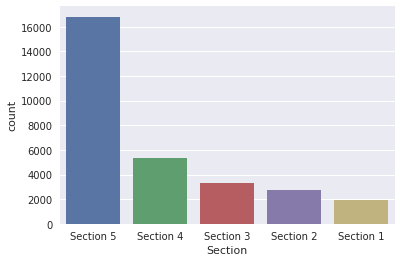

In [172]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Section", data=new_data)

[Text(0, 0, 'occupation_Prof-specialty'),
 Text(0, 0, 'occupation_Exec-managerial'),
 Text(0, 0, 'occupation_Sales'),
 Text(0, 0, 'occupation_Craft-repair'),
 Text(0, 0, 'occupation_Adm-clerical')]

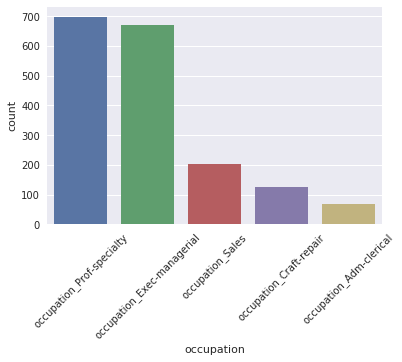

In [185]:
sns.set(style="darkgrid")
ax = sns.countplot(x="occupation", data=output,order=pd.value_counts(output['occupation']).iloc[:5].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'relationship_Husband'),
 Text(0, 0, 'relationship_Wife'),
 Text(0, 0, 'relationship_Not-in-family')]

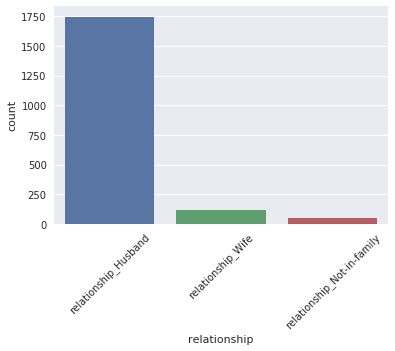

In [186]:
sns.set(style="darkgrid")
ax = sns.countplot(x="relationship", data=output,order=pd.value_counts(output['relationship']).iloc[:3].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'workclass_Private'),
 Text(0, 0, 'workclass_Self-emp-inc'),
 Text(0, 0, 'workclass_Federal-gov')]

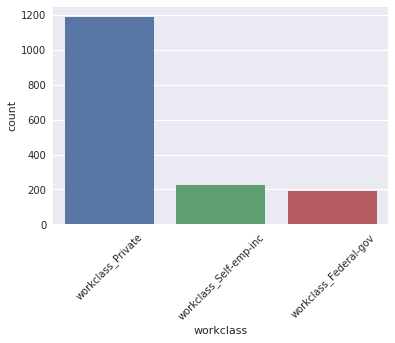

In [189]:
sns.set(style="darkgrid")
ax = sns.countplot(x="workclass", data=output,order=pd.value_counts(output['workclass']).iloc[:3].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)